<a href="https://colab.research.google.com/github/Ihssene-Brahimi/Data_Analysis_Univ/blob/main/ANAD_ANOVA_exo5_exo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

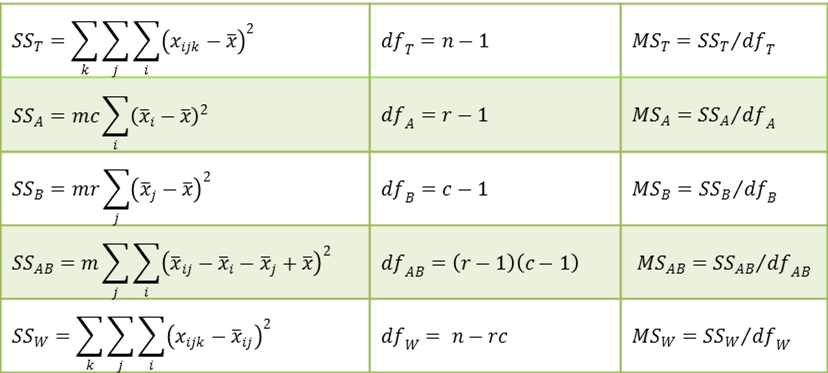

# **ANAD EXO 5**

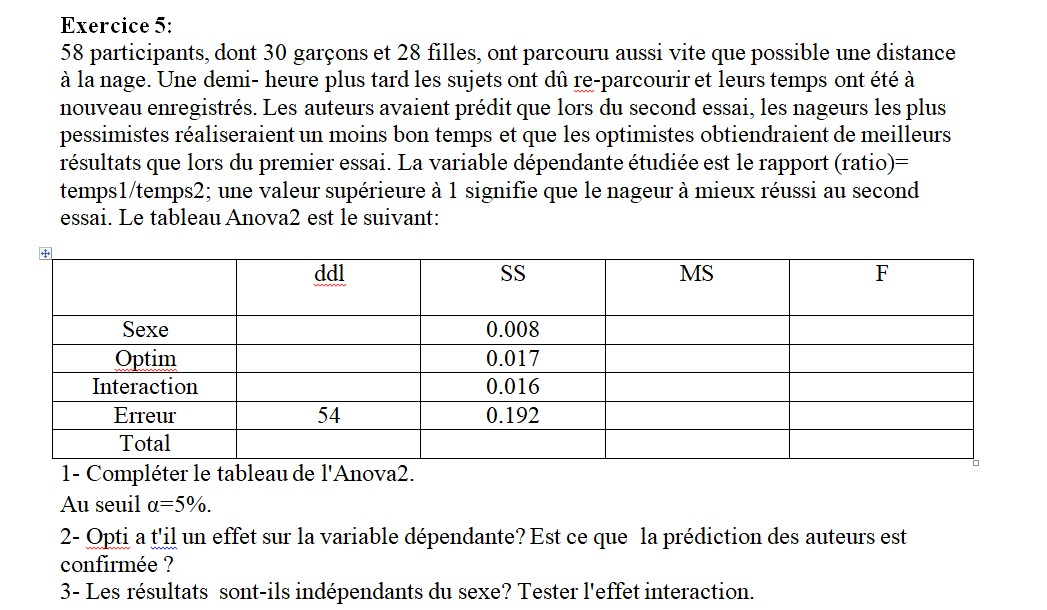

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.graphics.factorplots import interaction_plot

## Test optimism

H0 " b1=b2=0" vs "il exist k=1..2 : bk /= 0"

Sous H0:

F2= MS2/MSE = 4.857 > f(1,54)

Donc H0 nest pas accepté

Optimisme a d"effet sur le resultat

pour passer a anova1 il faut un facteur sans effet + interaction sans effet

## Test Sexe

H0 " a1=a2=0" vs "il exist j=1..2 : aj /= 0"

Sous H0:

F2= MS1/MSE = 4.857 < f(1,54)

Donc H0 est pas accepté

Sexe n'a pas d'effet sur le resultat

## Test Interaction

H0 " qq soit i,j = 1..2 ; gjk=0" vs H1 "il exist j,k=1..2 : gjk /= 0"

Sous H0:

F = MSI/MSE = 4.857 > f(1,54)

Donc H0 est pas accepté

Sexe n'a pas d'effet sur le resultat

avantage dbscan vs kmeans
cluster quality
mean point


# **ANAD EXO 6**

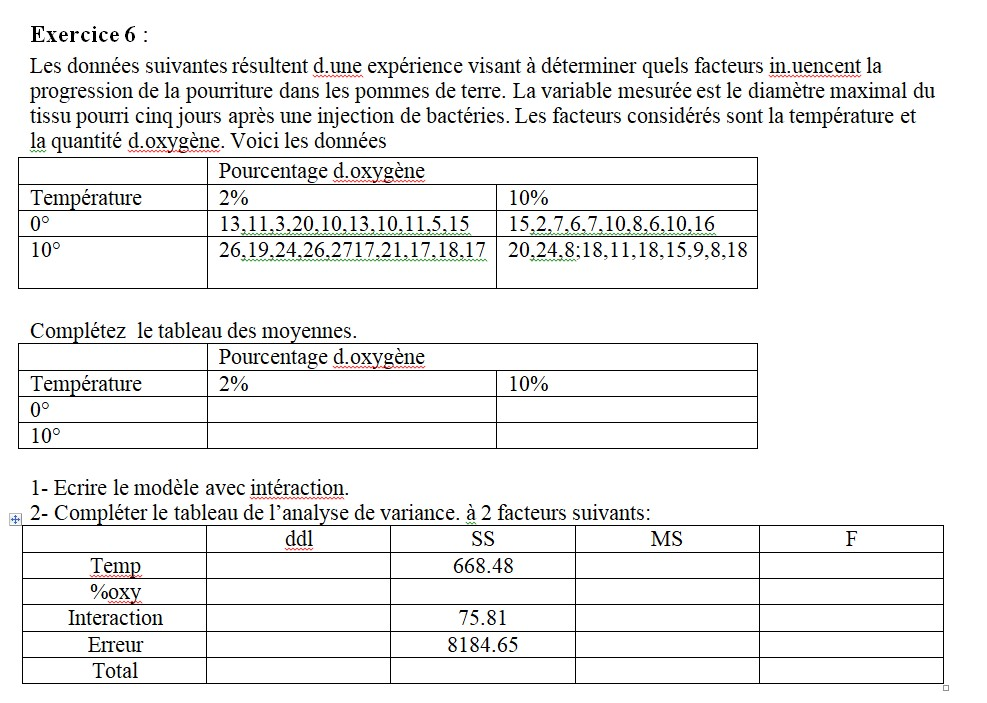

In [ ]:
# creating the dataframe
df = pd.DataFrame({'Oxygene': [0.02, 0.02, 0.02, 0.02, 0.02,0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                   'Temperature': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
                   'Diametre': [13, 11, 3, 20, 10, 13, 10, 11, 5, 15, 26, 19, 24, 26, 27, 17, 21, 17, 18, 17, 15, 2, 7, 6, 7, 10, 8, 6, 10, 16, 20, 24, 8, 18, 11, 18, 15, 9, 8, 18]
                   })
  
# displaying the dataframe
df

,Oxygene,Temperature,Diametre
0,0.02,0,13
1,0.02,0,11
2,0.02,0,3
3,0.02,0,20
4,0.02,0,10
5,0.02,0,13
6,0.02,0,10
7,0.02,0,11
8,0.02,0,5
9,0.02,0,15


# ***Interaction plot***

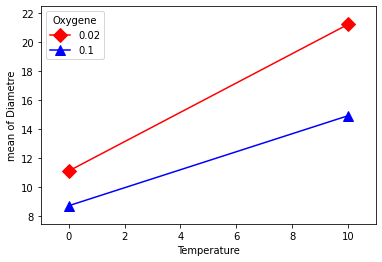

In [ ]:
fig = interaction_plot(df.Temperature, df.Oxygene, df.Diametre,
             colors=['red','blue'], markers=['D','^'], ms=10)

# **Calculation of Sum of Squares**

The calculations of the sum of squares (the variance in the data) are quite simple using Python. First, we start with getting the sample size (N) and the degree of freedoms needed. We will use them later to calculate the mean square. After we have the degree of freedom we continue with the calculation of the sum of squares.

# **Degrées de liberté**

In [ ]:
N = len(df.Diametre)
dfa = len(df.Temperature.unique()) - 1
dfb = len(df.Oxygene.unique()) - 1
dfab = dfa*dfb 
dfw = N - (len(df.Temperature.unique())*len(df.Oxygene.unique()))

In [ ]:
dfw

36

# **Sum of squares**

In [ ]:
grand_mean = df['Diametre'].mean()
grand_mean

13.975

In [ ]:
ssa = sum([(df[df.Temperature ==l].Diametre.mean()-grand_mean)**2 for l in df.Temperature])
ssa

664.2250000000001

In [ ]:
((df[df.Temperature ==0].Diametre.mean()-grand_mean)**2)*20+((df[df.Temperature ==10].Diametre.mean()-grand_mean)**2)*20

664.2249999999999

In [ ]:
ssa = sum([(df[df.Temperature ==l].Diametre.mean()-grand_mean)**2 for l in df.Temperature])
ssa

664.2250000000001

In [ ]:
ssb = sum([(df[df.Oxygene ==l].Diametre.mean()-grand_mean)**2 for l in df.Oxygene])
ssb

189.22499999999982

In [ ]:
sst = sum((df.Diametre - grand_mean)**2)
sst

1698.975

In [ ]:
Temp0 = df[df.Temperature == 0]
Temp10 = df[df.Temperature == 10]
Temp0_oxygene_means = [Temp0[Temp0.Oxygene == d].Diametre.mean() for d in Temp0.Oxygene]
Temp10_oxygene_means = [Temp10[Temp10.Oxygene == d].Diametre.mean() for d in Temp10.Oxygene]

In [ ]:
S1=sum((Temp0.Diametre - Temp0_oxygene_means)**2)
S1

369.00000000000006

In [ ]:
S2=sum((Temp10.Diametre - Temp10_oxygene_means)**2)
S2

438.50000000000006

In [ ]:
ssw = sum((*Temp10.Diametre - Temp10_oxygene_means)**2) + sum((Temp0.Diametre - Temp0_oxygene_means)**2)
ssw

807.5000000000001

In [ ]:
ssab = sst-ssa-ssb-ssw
ssab

-6972.975

In [ ]:
dfg=df.groupby(['Temperature','Oxygene']).mean()
dfg

Diametre
Temperature Oxygene          
0           2            11.1
            10            8.7
10          2            21.2
            10           14.9

# **Modele avec Interaction**

$Yijk=μ+Tempi+Oxj+(Tempi*Oxj)+εijk$

$𝜇$ :Base level or intercept of the slope

$Tempi$  : The main effect of ith Temperature on the Diametre

$Oxj$  : The main effect of jth Oxygene on the Diametre

$(GiPostCodej)$  : Effect of interaction between ith Temperature and jth Oxygene on Diametre

$εijk$  : Error/residual or variation in the response variable which is not explained by the predictor variables.

In [ ]:
multiple_variables=ols('Diametre ~ C(Temperature) + C(Oxygene) + C(Temperature): C(Oxygene) ',data=df).fit()

In [ ]:
anova2=sms.anova_lm(multiple_variables, typ=2)
anova2

,sum_sq,df,F,PR(>F)
C(Temperature),664.225,1.0,29.612508,0.000004
C(Oxygene),189.225,1.0,8.436037,0.006251
C(Temperature):C(Oxygene),38.025,1.0,1.695232,0.201182
Residual,807.500,36.0,NaN,NaN


Here is how we can interpret these results.

p-value for Temperature <0.05 so it means that is significant contributed in Diametre. p-value for Oxygene <0.05 so it is also contributing in Diametre. p-value for interaction of Temperature and Oxygene > 0.05 which means that Diametre doesnt depends upon heating quality and season of year.

This effect can be visualized by plotting an interaction plot.

In [ ]:
dfa=1
dfb=1
dfab=1
dfw=36

In [ ]:
ssa=664.225
ssb=189.225
ssab=38.025
ssw=807.5

In [ ]:
# Mean Square A
msa = ssa/dfa

# Mean Square B
msb = ssb/dfb

# Mean Square AxB
msaxb = ssaxb/dfaxb

# Mean Square Within/Error/Residual
msw = ssw/dfw

In [ ]:
eta_squared(anova2)
omega_squared(anova2)
anova2.round(3)

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
C(Temperature),664.225,1.0,29.613,0.000,0.391,0.373
C(Oxygene),189.225,1.0,8.436,0.006,0.111,0.097
C(Temperature):C(Oxygene),38.025,1.0,1.695,0.201,0.022,0.009
Residual,807.500,36.0,NaN,NaN,NaN,NaN


# **F-score**

In [ ]:
# F-ratio A
f_a = msa/msw
# F-ratio B
f_b = msb/msw
# F-ratio AxB
f_axb = msaxb/msw

In [ ]:
f_a

29.612507739938085

In [ ]:
f_b

8.436037151702777

# **P-value**

In [ ]:
p_a = st.f.sf(f_a, dfa, dfw)
p_b = st.f.sf(f_b, dfb, dfw)
p_axb = st.f.sf(f_axb, dfab, dfw)

In [ ]:
p_a

3.8747256212056e-06

In [ ]:
results = {'DF':[dfa, dfb, dfab, dfw],
           'SS':[ssa, ssb, ssab, ssw],
           'MS':[msa, msb, msaxb, msw],
           'F':[f_a, f_b, f_axb, 'NaN'],
            'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns=['DF', 'SS', 'MS', 'F', 'PR(>F)']
anova1 = pd.DataFrame(results, columns=columns,
                          index=['Temperature', 'Oxygene', 
                          'Temperature:Oxygene', 'Residual'])

In [ ]:
anova1

,DF,SS,MS,F,PR(>F)
Temperature,1,664.225,664.225000,29.612508,0.000004
Oxygene,1,189.225,189.225000,8.436037,0.006251
Temperature:Oxygene,1,-6972.975,38.025000,1.695232,0.201182
Residual,36,807.500,22.430556,NaN,NaN


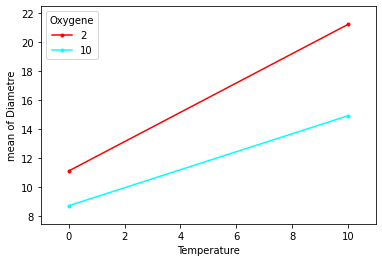

In [ ]:
interaction_plot(df['Temperature'],df['Oxygene'],df['Diametre']).show()

# **F-critical**

# 1. Temperature

In [ ]:
st.f.ppf(q=1-.05, dfn=dfa, dfd=dfw)

4.1131652768128895

Fscore > Fcritical so we reject H0, and the temperature affects the diameter 

# 2. Oxygene

In [ ]:
st.f.ppf(q=1-.05, dfn=dfb, dfd=dfw)

4.1131652768128895

Fscore > Fcritical so we reject H0, and the Oxygene affects the diameter 

# 3. Interaction

In [ ]:
st.f.ppf(q=1-.05, dfn=dfab, dfd=dfw)

4.1131652768128895

Fscore < Fcritical so we accept H0, and the temperatureXOxygene Interaction doesn't affect the diameter 

# **References**

https://www.kaggle.com/code/alexmaszanski/two-way-anova-with-python

https://www.kaggle.com/code/brekhnaa/two-way-anova-and-interactions

https://www.real-statistics.com/two-way-anova/two-factor-anova-with-replication/

https://www.wallstreetmojo.com/two-way-anova/

https://www.statology.org/two-way-anova/




